In [1]:
pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

# Read Data

In [60]:
# Load metrics

#df_dailysteps=pd.read_csv("Resources\steps_p01.csv",index_col='Dates',parse_dates=True)

df_dailysteps=pd.read_csv("Resources\steps_p01.csv")


# Shape of Data

In [61]:
# Daily steps

df_dailysteps=df_dailysteps.dropna()
print('Shape of data',df_dailysteps.shape)
df_dailysteps.head()

Shape of data (117, 3)


,Participant_ID,Dates,Steps
0,p01,2019-11-01,4664
1,p01,2019-11-02,3035
2,p01,2019-11-04,1284
3,p01,2019-11-05,4966
4,p01,2019-11-08,2094


In [66]:
df_dailysteps = df_dailysteps.drop(["Participant_ID"],axis=1)

In [67]:
df_dailysteps.dtypes

Dates    datetime64[ns]
Steps             int64
dtype: object

In [68]:
df_dailysteps['Dates'] = pd.to_datetime(df_dailysteps['Dates'], infer_datetime_format = True)

In [69]:
df_dailysteps.dtypes

Dates    datetime64[ns]
Steps             int64
dtype: object

In [74]:
df_dailysteps = df_dailysteps.set_index(df_dailysteps['Dates'])
df_dailysteps = df_dailysteps.drop(["Dates"],axis=1)
df_dailysteps.head()

,Steps
Dates,
2019-11-01,4664
2019-11-02,3035
2019-11-04,1284
2019-11-05,4966
2019-11-08,2094


In [95]:
df_dailysteps.tail()

,Steps
Dates,
2020-03-26,3415
2020-03-27,6371
2020-03-28,7599
2020-03-29,1279
2020-03-31,3846


# Plot Data

<AxesSubplot:xlabel='Dates'>

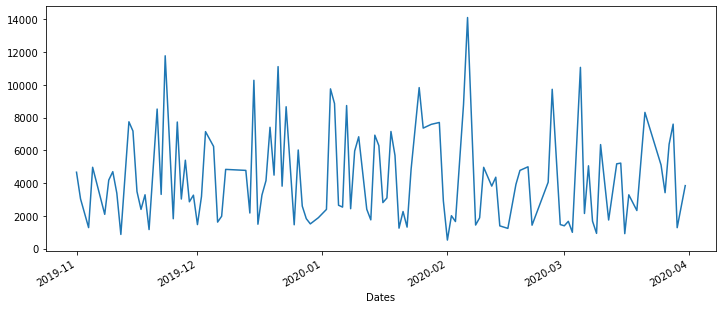

In [75]:
df_dailysteps['Steps'].plot(figsize=(12,5))

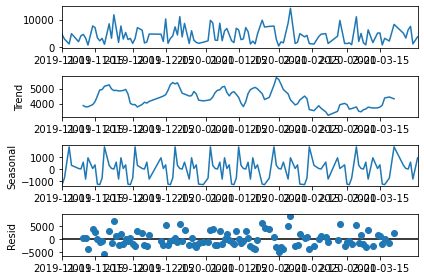

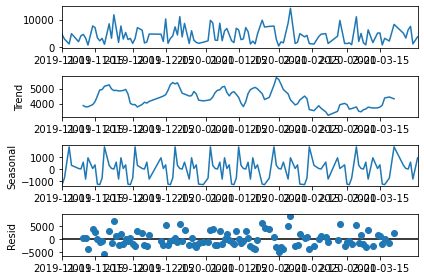

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_data = seasonal_decompose(df_dailysteps, model = "additive", period = 12)
decomposed_data.plot()

# Check For Stationarity

In [79]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [80]:
# Daily Steps

adf_test(df_dailysteps['Steps'])

1. ADF :  -10.766997253070219
2. P-Value :  2.438222734005813e-19
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


# Figure Out Order for ARIMA Model

In [81]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Daily Steps

stepwise_fit = auto_arima(df_dailysteps['Steps'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  117
Model:                        SARIMAX   Log Likelihood               -1097.521
Date:                Tue, 17 May 2022   AIC                           2199.042
Time:                        23:00:58   BIC                           2204.567
Sample:                             0   HQIC                          2201.285
                                - 117                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4365.1966    334.512     13.049      0.000    3709.565    5020.828
sigma2      8.229e+06   1.28e+06      6.440      0.000    5.72e+06    1.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.92
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split Data into Training and Testing

In [83]:
# Daily Steps

print(df_dailysteps.shape)
train_steps=df_dailysteps.iloc[:-30]
test_steps=df_dailysteps.iloc[-30:]
print(train_steps.shape,test_steps.shape)
print(test_steps.iloc[0],test_steps.iloc[-1])

(117, 1)
(87, 1) (30, 1)
Steps    1236
Name: 2020-02-16 00:00:00, dtype: int64 Steps    3846
Name: 2020-03-31 00:00:00, dtype: int64


# Train the Model

In [84]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [15]:
# Daily Steps
#model=ARIMA(train_steps['Steps'],order=(0,1,2))
#model_steps=model.fit()
#model_steps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Steps   No. Observations:                   86
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -810.512
Method:                       css-mle   S.D. of innovations           2922.415
Date:                Tue, 17 May 2022   AIC                           1629.024
Time:                        22:12:13   BIC                           1638.842
Sample:                             1   HQIC                          1632.975
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6210     13.041      0.431      0.666     -19.939      31.181
ma.L1.D.Steps    -0.9535      0.121     -7.907      0.000      -1.190      -0.717
ma.L2.D.Steps    -0.0465      0.117     -0.398      0.690      -0.275       0.182
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2          -21.5208           +0.0000j           21.5208            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
model = sm.tsa.statespace.SARIMAX(train_steps, order=(0,1,2), seasonal_order = (0,1,2,12))
model_steps=model.fit()
model_steps.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Steps   No. Observations:                   87
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -708.744
Date:                            Tue, 17 May 2022   AIC                           1427.488
Time:                                    23:13:14   BIC                           1439.008
Sample:                                         0   HQIC                          1432.084
                                             - 87                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8864      4.292     -0.207      0.836      -9.299       7.526
ma.L2         -0.1134      0.476     -0.238      0.812      -1.046       0.819
ma.S.L12      -0.9399      4.298     -0.219      0.827      -9.363       7.483
ma.S.L24      -0.0471      0.369     -0.128      0.898      -0.770       0.676
sigma2      9.112e+06   4.42e-07   2.06e+13      0.000    9.11e+06    9.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 5.99
Prob(Q):                              0.74   Prob(JB):                         0.05
Heteroskedasticity (H):               1.71   Skew:                             0.70
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+30. Standard errors may be unstable.
"""

In [98]:
predictions = model_steps.predict(start='2019-11-01',end ='2020-03-31')

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error ()

# Make Predictions on Test Set

In [108]:
# Daily Steps
train_steps

,Steps
Dates,
2019-11-01,4664
2019-11-02,3035
2019-11-04,1284
2019-11-05,4966
2019-11-08,2094
...,...
2020-02-09,1883
2020-02-10,4963
2020-02-12,3817


<AxesSubplot:xlabel='Dates'>

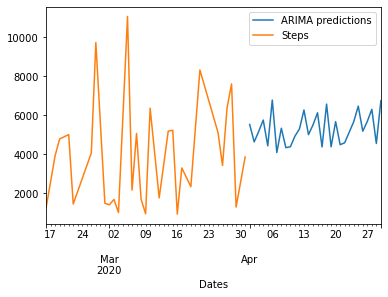

In [113]:
start=len(train_steps)
end=len(train_steps)+len(test_steps)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2020-04-01',end='2020-04-30')


pred=model_steps.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#index_future_dates=pd.date_range(start='2019-11-01',end='2020-03-31')
pred.index=index_future_dates
pred.plot(legend=True)
test_steps['Steps'].plot(legend=True)

